# K-Means for microprocessor

---

In [1]:
# For avoiding memory leak when working with K-means
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import sklearn.cluster as skl

In [3]:
microprocessors_data = pd.read_csv("microprocessor.csv")
microprocessors_data.head()

,Nombre,Frecuencia (GHz),Precio ($)
0,Intel Core i9-11900K,5.3,550
1,AMD Ryzen 9 5950X,4.9,800
2,Intel Core i7-11700K,5.0,400
3,AMD Ryzen 7 5800X,4.7,450
4,Intel Core i5-11600K,4.9,270


In [4]:
# Let's define our K with elbow technic
# So we just need GHz and Price

microprocessors_data.columns

Index(['Nombre', ' Frecuencia (GHz)', ' Precio ($)'], dtype='object')

In [5]:
ghz_price_microproccesors = microprocessors_data[[' Frecuencia (GHz)',' Precio ($)']]
ghz_price_microproccesors.head()

,Frecuencia (GHz),Precio ($)
0,5.3,550
1,4.9,800
2,5.0,400
3,4.7,450
4,4.9,270


In [6]:
# Find elbow
inertias = []
for k in range(1,10):
    kmeansModel = skl.KMeans(n_clusters=k)
    # Training with k clusters and data of frecuqncy and price
    kmeansModel.fit(ghz_price_microproccesors)
    inertias.append(kmeansModel.inertia_)
inertias


[2269205.729791667,
 626535.3669444444,
 290272.9855050505,
 179887.29848357523,
 89044.28926388892,
 52259.43408333333,
 34777.686570707076,
 24360.913237373738,
 18517.500416666666]

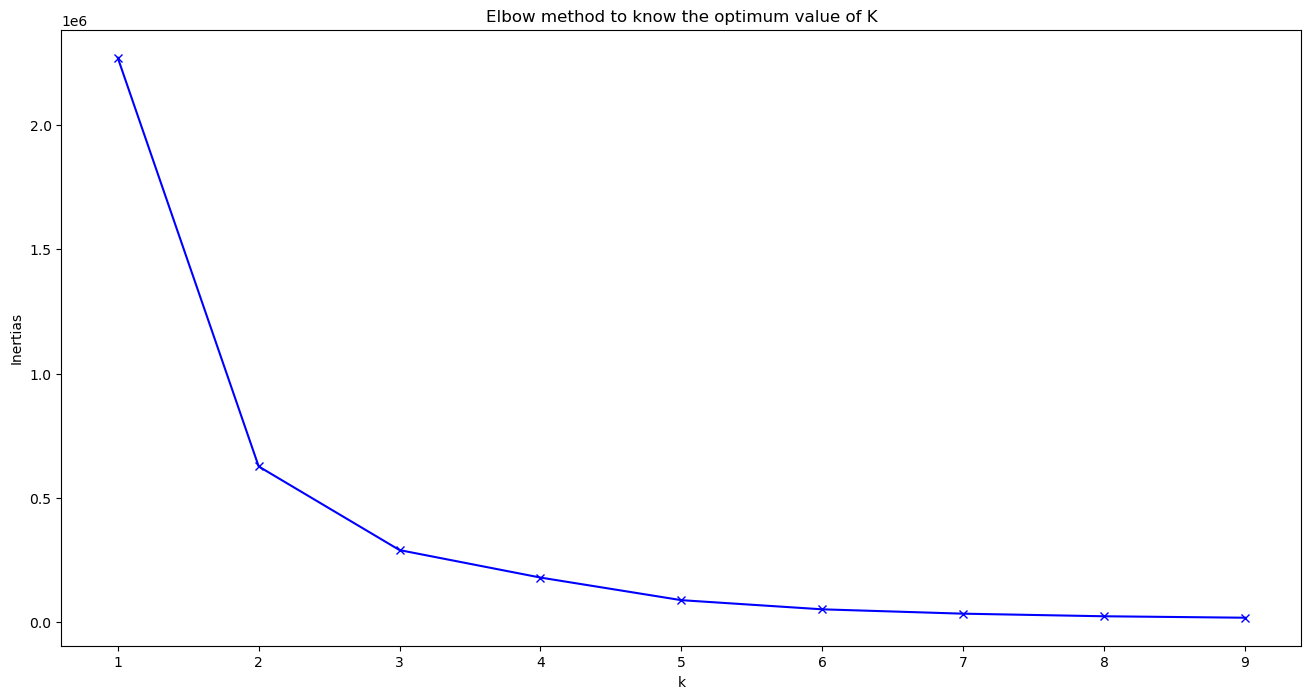

In [7]:
# Plot
#Grafica de codo
plot.figure(figsize=(16,8))
K = range(1,10)
plot.plot(K, inertias, 'bx-')
plot.xlabel('k')
plot.ylabel('Inertias')
plot.title('Elbow method to know the optimum value of K')
plot.show()

In [8]:
# So the best value for K is 2, beacuase there is a big change in 2
k = 2

In [9]:
# Lets start the K-means
kmeansModel = skl.KMeans(n_clusters=k)
# With our data
kmeansModel.fit(ghz_price_microproccesors)


KMeans(n_clusters=2)

In [10]:
# Lets find the centroids
centroids = kmeansModel.cluster_centers_
centroids

array([[  4.28888889, 297.77777778],
       [  4.60833333, 725.        ]])

In [11]:
# Obtaining the labels
labels = kmeansModel.predict(ghz_price_microproccesors)
# Also adding that new column to our data
ghz_price_microproccesors['label'] = labels


In [21]:
ghz_price_microproccesors.head()

,Frecuencia (GHz),Precio ($),label
0,5.3,550,1
1,4.9,800,1
2,5.0,400,0
3,4.7,450,0
4,4.9,270,0


In [22]:
# Lets plot our data
colors = ['red','blue','green','pink','orange']
centroids_colors = []
data_colors = []

for label in labels:
    data_colors.append(colors[label]) # red or blue
    
for  i in range(len(centroids)):
    centroids_colors.append(colors[i]) # red or blue

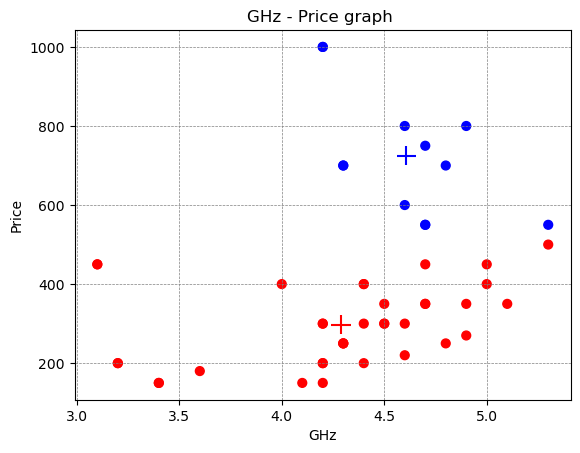

In [23]:
# plot
ax = plot.axes()
ax.scatter(microprocessors_data[' Frecuencia (GHz)'], microprocessors_data[' Precio ($)'], c=data_colors, marker='o', s=40)
ax.scatter(centroids[:,0], centroids[:,1], c=centroids_colors, marker='+', s=200)
plot.xlabel('GHz')
plot.ylabel('Price')
plot.title('GHz - Price graph ')
plot.grid(color='gray', linestyle='--', linewidth = 0.5)
plot.show()


In [20]:
# Exporting our data into a CSV
ghz_price_microproccesors.to_csv('GHz-price.csv', encoding='ISO-8859-1')